In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Definimos las funciones para obtener las distancias y los histogramas

def dist2d(x_1,y_1,x_2,y_2):
    d=np.sqrt((x_2 - x_1)**2 + (y_2-y_1)**2)
    return d

def distancias2d(datos,n,Histo,tbin):
    for i in range(0,n):
        for j in range(i+1,n):
            distancia=dist2d(datos[0][i],datos[1][i], datos[0][j],datos[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo

def distancias2ddr(datos,random,nd,nr,Histo,tbin):
    for i in range(0,nd):
        for j in range(0,nr):
            distancia=dist2d(datos[0][i],datos[1][i], random[0][j],random[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo
            
def dist_3d(x_1,y_1,z_1,x_2,y_2,z_2):
    d=np.sqrt((x_2 - x_1)**2 + (y_2-y_1)**2+(z_2-z_1)**2)
    return d

def distancias3d(datos,n,Histo,tbin):
    for i in range(0,n):
        for j in range(i+1,n):
            distancia_3d=dist_3d(datos_3d[0][i],datos_3d[1][i], datos_3d[2][i],datos_3d[0][j],datos_3d[1][j], datos_3d[2][j])
            indice=int(distancia_3d/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo

In [3]:
#Sacamos las distancias entre DD, RR y DR, en 2d
def DD(datos,nd,Histo1,tbin,nDistDD):
    dd=distancias2d(datos,nd,Histo1,tbin)/nDistDD
    return dd

def RR(random,nr,Histo2,tbin, nDistRR):
    rr=distancias2d(random,nr,Histo2,tbin)/nDistRR
    return rr

def DR(datos,random,nd,nr,Histo3,tbin,nDistDR):
    dr=distancias2ddr(datos,random,nd,nr,Histo3,tbin)/nDistDR
    return dr

In [5]:
def LS(dd,rr,dr):
    name='Landy-Szlay'
    corr= (dd+rr-2*dr)/rr
    return name,corr

def He(dd,rr,dr):   
    name='Hewett'
    corr= (dd-dr)/rr
    return name,corr

def DP(dd,rr,dr):
    name='David & Peebles'
    corr= (dd/dr)-1
    return name,corr

def Ha(dd,rr,dr):
    name='Hamilton'
    corr= (dd*rr)/(dr)**2 -1
    return name,corr

In [10]:
#Creamos arreglos de datos para D=R en N_R=5*N_D

#crear la distribución random de pares
L=50
nd=1000

datos=(L*np.random.random(nd),L*np.random.random(nd))

nr=5000

random=(L*np.random.random(nr),L*np.random.random(nr))




nbins=50 #numero de bins
dmax = np.sqrt(2*50**2) #Distancia maxima de las divisiones
dmin = 0.0 #distancia mínima
tbin = (dmax-dmin)/nbins #Tamaño del bin

Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

nDistDD=nd*(nd-1)/2 #Numero de pares para el arreglo 1

nDistRR=nr*(nr-1)/2 #Numero de pares para el arreglo 2

nDistDR=nd*nr #numero de distancias DR

binss=np.arange(dmin,dmax,tbin) #Arreglo de las divisiones para hacer el histograma

In [11]:
#Funciones de correlación para D=R

dd=DD(datos,nd,Histo1,tbin,nDistDD)
rr=RR(random,nr,Histo2,tbin, nDistRR)
dr=DR(datos,random,nd,nr,Histo3,tbin,nDistDR)

name1,corr1=LS(dd,rr,dr)
name2,corr2=He(dd,rr,dr)
name3,corr3=DP(dd,rr,dr)
name4,corr4=Ha(dd,rr,dr)

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=R')

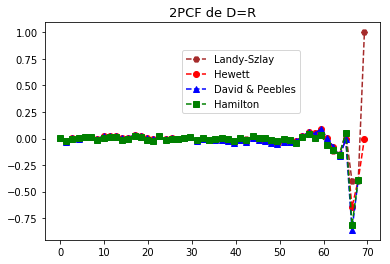

In [12]:
plt.plot(binss,corr1,'--H',label=str(name1),color='brown')
plt.plot(binss,corr2,'--o',label=str(name2),color='red')
plt.plot(binss,corr3,'--g^',label=str(name3),color='blue')
plt.plot(binss,corr4,'--s',label=str(name4),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=R',fontsize=13)

In [43]:
#Creamos datos para D=anillo en N_R=5*N_D
x=np.zeros(nd)
y=np.zeros(nd)
theta=np.random.random(nd)*2*np.pi


x=25*np.cos(theta)+25
y=25*np.sin(theta)+25

datos_anillo=(x,y)

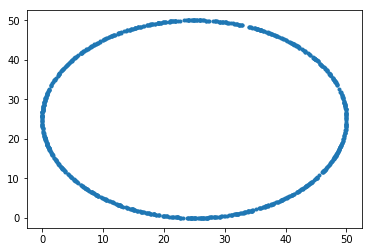

In [44]:
plt.plot(datos_anillo[:][0],datos_anillo[:][1],'.')

In [45]:
#Funciones de correlación para D=anillo

dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random,nd,nr,Histo3,tbin,nDistDR)

name1_anillo,corr1_anillo=LS(dd,rr,dr)
name2_anillo,corr2_anillo=He(dd,rr,dr)
name3_anillo,corr3_anillo=DP(dd,rr,dr)
name4_anillo,corr4_anillo=Ha(dd,rr,dr)

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=anillo')

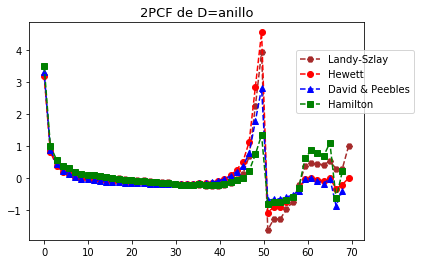

In [46]:
plt.plot(binss,corr1_anillo,'--H',label=str(name1_anillo),color='brown')
plt.plot(binss,corr2_anillo,'--o',label=str(name2_anillo),color='red')
plt.plot(binss,corr3_anillo,'--g^',label=str(name3_anillo),color='blue')
plt.plot(binss,corr4_anillo,'--s',label=str(name4_anillo),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=anillo',fontsize=13)

In [48]:
#Creamos datos para D=disco en N_R=5*N_D
x_=np.zeros(nd)
y_=np.zeros(nd)
theta_=np.random.random(nd)*2*np.pi

r2=10*np.random.random(nd)
r=r2**(0.5)+15

x_=r*np.cos(theta_)+25
y_=r*np.sin(theta_)+25

datos_disco=(x_,y_)

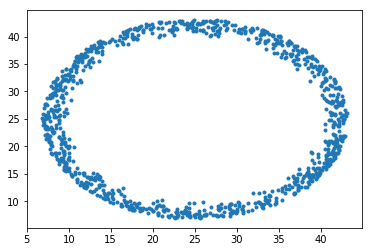

In [49]:
plt.plot(datos_disco[:][0],datos_disco[:][1],'.')

In [50]:
#Funciones de correlación para D=disco


Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)


dd=DD(datos_disco,nd,Histo1,tbin,nDistDD)
rr=RR(random,nr,Histo2,tbin, nDistRR)
dr=DR(datos_disco,random,nd,nr,Histo3,tbin,nDistDR)

name1_disco,corr1_disco=LS(dd,rr,dr)
name2_disco,corr2_disco=He(dd,rr,dr)
name3_disco,corr3_disco=DP(dd,rr,dr)
name4_disco,corr4_disco=Ha(dd,rr,dr)

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=disco')

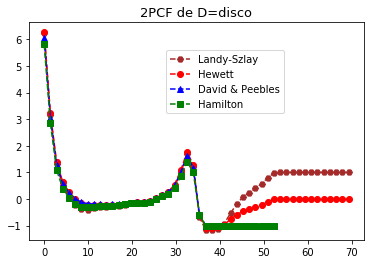

In [51]:
plt.plot(binss,corr1_disco,'--H',label=str(name1_disco),color='brown')
plt.plot(binss,corr2_disco,'--o',label=str(name2_disco),color='red')
plt.plot(binss,corr3_disco,'--g^',label=str(name3_disco),color='blue')
plt.plot(binss,corr4_disco,'--s',label=str(name4_disco),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=disco',fontsize=13)

In [54]:
#Generamos nuevos random, ahora con N_R=N_D

nr=1000

random_1=(L*np.random.random(nr),L*np.random.random(nr))
random_2=(L*np.random.random(nr),L*np.random.random(nr))
random_3=(L*np.random.random(nr),L*np.random.random(nr))
random_4=(L*np.random.random(nr),L*np.random.random(nr))
random_5=(L*np.random.random(nr),L*np.random.random(nr))

In [57]:
#Funciones de correlación para D=R

#Vuelta 1
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos,nd,Histo1,tbin,nDistDD)
rr=RR(random_1,nr,Histo2,tbin, nDistRR)
dr=DR(datos,random_1,nd,nr,Histo3,tbin,nDistDR)

name1_1,corr1_1=LS(dd,rr,dr)
name2_1,corr2_1=He(dd,rr,dr)
name3_1,corr3_1=DP(dd,rr,dr)
name4_1,corr4_1=Ha(dd,rr,dr)

#Vuelta 2
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos,nd,Histo1,tbin,nDistDD)
rr=RR(random_2,nr,Histo2,tbin, nDistRR)
dr=DR(datos,random_2,nd,nr,Histo3,tbin,nDistDR)

name1_1,corr1_2=LS(dd,rr,dr)
name2_1,corr2_2=He(dd,rr,dr)
name3_1,corr3_2=DP(dd,rr,dr)
name4_1,corr4_2=Ha(dd,rr,dr)


#Vuelta 3
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos,nd,Histo1,tbin,nDistDD)
rr=RR(random_3,nr,Histo2,tbin, nDistRR)
dr=DR(datos,random_3,nd,nr,Histo3,tbin,nDistDR)

name1_1,corr1_3=LS(dd,rr,dr)
name2_1,corr2_3=He(dd,rr,dr)
name3_1,corr3_3=DP(dd,rr,dr)
name4_1,corr4_3=Ha(dd,rr,dr)



#Vuelta 4
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos,nd,Histo1,tbin,nDistDD)
rr=RR(random_4,nr,Histo2,tbin, nDistRR)
dr=DR(datos,random_4,nd,nr,Histo3,tbin,nDistDR)

name1_1,corr1_4=LS(dd,rr,dr)
name2_1,corr2_4=He(dd,rr,dr)
name3_1,corr3_4=DP(dd,rr,dr)
name4_1,corr4_4=Ha(dd,rr,dr)




#Vuelta 5
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos,nd,Histo1,tbin,nDistDD)
rr=RR(random_5,nr,Histo2,tbin, nDistRR)
dr=DR(datos,random_5,nd,nr,Histo3,tbin,nDistDR)

name1_1,corr1_5=LS(dd,rr,dr)
name2_1,corr2_5=He(dd,rr,dr)
name3_1,corr3_5=DP(dd,rr,dr)
name4_1,corr4_5=Ha(dd,rr,dr)


corr1=(corr1_1+corr1_2+corr1_3+corr1_4+corr1_5)/5.
corr2=(corr2_1+corr2_2+corr2_3+corr2_4+corr2_5)/5.
corr3=(corr3_1+corr3_2+corr3_3+corr3_4+corr3_5)/5.
corr4=(corr4_1+corr4_2+corr4_3+corr4_4+corr4_5)/5.

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale

Text(0.5,1,'2PCF de D=R')

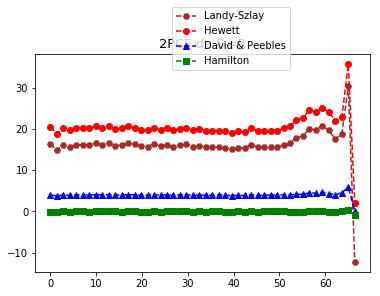

In [58]:
plt.plot(binss,corr1,'--H',label=str(name1),color='brown')
plt.plot(binss,corr2,'--o',label=str(name2),color='red')
plt.plot(binss,corr3,'--g^',label=str(name3),color='blue')
plt.plot(binss,corr4,'--s',label=str(name4),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=R',fontsize=13)

In [59]:
#Funciones de correlación para D=anillo

#Vuelta 1
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random_1,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random_1,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_anillo_1=LS(dd,rr,dr)
name2_anillo_1,corr2_anillo_1=He(dd,rr,dr)
name3_anillo_1,corr3_anillo_1=DP(dd,rr,dr)
name4_anillo_1,corr4_anillo_1=Ha(dd,rr,dr)

#Vuelta 2
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random_2,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random_2,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_anillo_2=LS(dd,rr,dr)
name2_anillo_1,corr2_anillo_2=He(dd,rr,dr)
name3_anillo_1,corr3_anillo_2=DP(dd,rr,dr)
name4_anillo_1,corr4_anillo_2=Ha(dd,rr,dr)


#Vuelta 3
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random_3,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random_3,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_anillo_3=LS(dd,rr,dr)
name2_anillo_1,corr2_anillo_3=He(dd,rr,dr)
name3_anillo_1,corr3_anillo_3=DP(dd,rr,dr)
name4_anillo_1,corr4_anillo_3=Ha(dd,rr,dr)



#Vuelta 4
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random_4,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random_4,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_anillo_4=LS(dd,rr,dr)
name2_anillo_1,corr2_anillo_4=He(dd,rr,dr)
name3_anillo_1,corr3_anillo_4=DP(dd,rr,dr)
name4_anillo_1,corr4_anillo_4=Ha(dd,rr,dr)




#Vuelta 5
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_anillo,nd,Histo1,tbin,nDistDD)
rr=RR(random_5,nr,Histo2,tbin, nDistRR)
dr=DR(datos_anillo,random_5,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_anillo_5=LS(dd,rr,dr)
name2_anillo_1,corr2_anillo_5=He(dd,rr,dr)
name3_anillo_1,corr3_anillo_5=DP(dd,rr,dr)
name4_anillo_1,corr4_anillo_5=Ha(dd,rr,dr)


corr1_anillo=(corr1_anillo_1+corr1_anillo_2+corr1_anillo_3+corr1_anillo_4+corr1_anillo_5)/5.
corr2_anillo=(corr2_anillo_1+corr2_anillo_2+corr2_anillo_3+corr2_anillo_4+corr2_anillo_5)/5.
corr3_anillo=(corr3_anillo_1+corr3_anillo_2+corr3_anillo_3+corr3_anillo_4+corr3_anillo_5)/5.
corr4_anillo=(corr4_anillo_1+corr4_anillo_2+corr4_anillo_3+corr4_anillo_4+corr4_anillo_5)/5.

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=anillo')

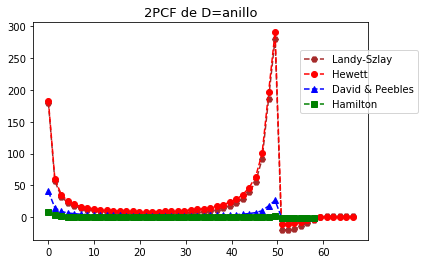

In [60]:
plt.plot(binss,corr1_anillo,'--H',label=str(name1_anillo),color='brown')
plt.plot(binss,corr2_anillo,'--o',label=str(name2_anillo),color='red')
plt.plot(binss,corr3_anillo,'--g^',label=str(name3_anillo),color='blue')
plt.plot(binss,corr4_anillo,'--s',label=str(name4_anillo),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=anillo',fontsize=13)

In [61]:
#Funciones de correlación para D=disco

#Vuelta 1
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_disco,nd,Histo1,tbin,nDistDD)
rr=RR(random_1,nr,Histo2,tbin, nDistRR)
dr=DR(datos_disco,random_1,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_disco_1=LS(dd,rr,dr)
name2_anillo_1,corr2_disco_1=He(dd,rr,dr)
name3_anillo_1,corr3_disco_1=DP(dd,rr,dr)
name4_anillo_1,corr4_disco_1=Ha(dd,rr,dr)

#Vuelta 2
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_disco,nd,Histo1,tbin,nDistDD)
rr=RR(random_2,nr,Histo2,tbin, nDistRR)
dr=DR(datos_disco,random_2,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_disco_2=LS(dd,rr,dr)
name2_anillo_1,corr2_disco_2=He(dd,rr,dr)
name3_anillo_1,corr3_disco_2=DP(dd,rr,dr)
name4_anillo_1,corr4_disco_2=Ha(dd,rr,dr)


#Vuelta 3
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_disco,nd,Histo1,tbin,nDistDD)
rr=RR(random_3,nr,Histo2,tbin, nDistRR)
dr=DR(datos_disco,random_3,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_disco_3=LS(dd,rr,dr)
name2_anillo_1,corr2_disco_3=He(dd,rr,dr)
name3_anillo_1,corr3_disco_3=DP(dd,rr,dr)
name4_anillo_1,corr4_disco_3=Ha(dd,rr,dr)



#Vuelta 4
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_disco,nd,Histo1,tbin,nDistDD)
rr=RR(random_4,nr,Histo2,tbin, nDistRR)
dr=DR(datos_disco,random_4,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_disco_4=LS(dd,rr,dr)
name2_anillo_1,corr2_disco_4=He(dd,rr,dr)
name3_anillo_1,corr3_disco_4=DP(dd,rr,dr)
name4_anillo_1,corr4_disco_4=Ha(dd,rr,dr)




#Vuelta 5
Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

dd=DD(datos_disco,nd,Histo1,tbin,nDistDD)
rr=RR(random_5,nr,Histo2,tbin, nDistRR)
dr=DR(datos_disco,random_5,nd,nr,Histo3,tbin,nDistDR)

name1_anillo_1,corr1_disco_5=LS(dd,rr,dr)
name2_anillo_1,corr2_disco_5=He(dd,rr,dr)
name3_anillo_1,corr3_disco_5=DP(dd,rr,dr)
name4_anillo_1,corr4_disco_5=Ha(dd,rr,dr)


corr1_disco=(corr1_disco_1+corr1_disco_2+corr1_disco_3+corr1_disco_4+corr1_disco_5)/5.
corr2_disco=(corr2_disco_1+corr2_disco_2+corr2_disco_3+corr2_disco_4+corr2_disco_5)/5.
corr3_disco=(corr3_disco_1+corr3_disco_2+corr3_disco_3+corr3_disco_4+corr3_disco_5)/5.
corr4_disco=(corr4_disco_1+corr4_disco_2+corr4_disco_3+corr4_disco_4+corr4_disco_5)/5.

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'2PCF de D=disco')

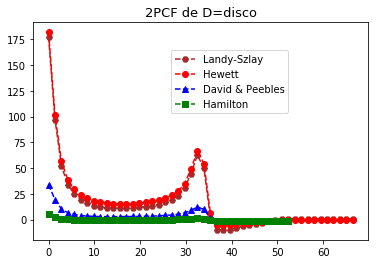

In [62]:
plt.plot(binss,corr1_disco,'--H',label=str(name1_disco),color='brown')
plt.plot(binss,corr2_disco,'--o',label=str(name2_disco),color='red')
plt.plot(binss,corr3_disco,'--g^',label=str(name3_disco),color='blue')
plt.plot(binss,corr4_disco,'--s',label=str(name4_disco),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})
plt.title('2PCF de D=disco',fontsize=13)

# Transformada de Fourier



In [63]:
#Transformada de fourier
def TF(x):
    N=x.size
    n = np.arange(N)
    k = n.reshape((N,1))
    exponencial = np.exp(-2j*np.pi*k*n/N)
    return np.dot(exponencial,x)

In [64]:
r = np.linspace(0, 20, 500, endpoint=True)
r0=2.
gama=1.5
fr=(r/r0)**(gama)

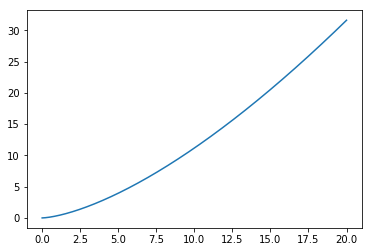

In [65]:
plt.plot(r,fr)

In [67]:
Transformada=TF(fr)

In [ ]:
plt,